<a href="https://colab.research.google.com/github/maryandy2002/maryandy2002/blob/main/Comparaci%C3%B3n_de_Interpolaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [6]:
def lagrange(a,b):
  x=sp.symbols("x")
  l=[]
  t=1
  d=1
  f=0
  for i in range(len(a)):
   for j in range(len(a)):
    if i!=j:
     t*=(x-a[j])
     d*=(a[i]-a[j])
     t=sp.expand(t)
   l.append(t/d)
   t=1
   d=1

  for i in range(len(a)):
   f+=l[i]*b[i]

  gf=sp.lambdify(x,f,'numpy')
  xx=np.linspace(min(a),max(a),1000)
  yf=gf(xx)

  return xx,yf

In [3]:
def diferencias_divididas(x_i,f_i):
  x=sp.symbols('x')
  n=len(x_i)

  #matriz de ceros de tamaño nxn
  Q = [[0 for _ in range(n)] for _ in range(n)]
  P = [1 for _ in range(n)]
  PP=0
  for i in range(n):
    Q[i][0]=f_i[i]

  for j in range(1,n):
    for i in range(j,n):
      Q[i][j]=(Q[i][j-1]-Q[i-1][j-1])/(x_i[i]-x_i[i-j])

  for j in range(0,n):
    for i in range(j):
      P[j]=P[j]*(x-x_i[i])
    PP=PP+Q[j][j]*P[j]

  # Función evaluable
  f_eval = sp.lambdify(x, PP, 'numpy')

  # Gráfica
  xx = np.linspace(min(x_i), max(x_i), 1000)
  yf = f_eval(xx)

  return xx,yf

In [4]:
def hermite(x_i,f_i,fp_i):
  x=sp.symbols('x')
  n=2*len(x_i)
  x_vals=[]
  #matriz de ceros
  Q = [[0 for _ in range(n)] for _ in range(n)]
  P = [1 for _ in range(n)]
  PP=0

  #Duplicar cada punto
  for i in range(n):
    if i%2==0:
      Q[i][0]=f_i[i//2]
      x_vals.append(x_i[i//2])
    else:
      Q[i][0]=f_i[i//2]
      x_vals.append(x_i[i//2])

  #Llenar prmieras diferencias divididas con la condicion de los valores de la función derivada
  for i in range(1,n):
    if i%2==1:
      Q[i][1]=fp_i[i//2]
    else:
      Q[i][1]=(Q[i][0]-Q[i-1][0])/(x_vals[i]-x_vals[i-1])

  for j in range(2,n):
    for i in range(j,n):
      Q[i][j]=(Q[i][j-1]-Q[i-1][j-1])/(x_vals[i]-x_vals[i-j])

  for j in range(0,n):
    for i in range(j):
      P[j]=P[j]*(x-x_vals[i])
    PP=PP+Q[j][j]*P[j]

  # Función evaluable
  f_eval = sp.lambdify(x, PP, 'numpy')

  # Gráfica
  xx = np.linspace(min(x_i), max(x_i), 1000)
  yf = f_eval(xx)

  return xx,yf

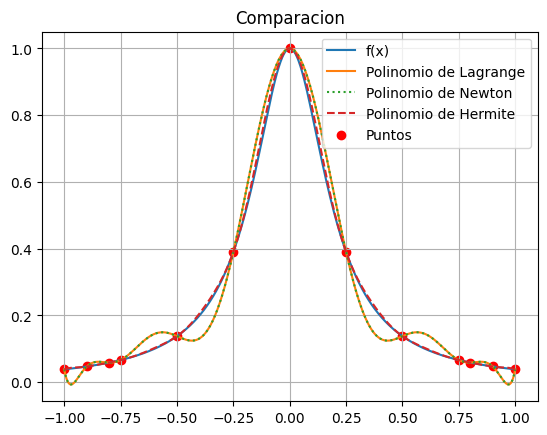

In [12]:
x=sp.symbols("x")
f=1/(1+25*(x)**2)
ff = sp.lambdify(x, f, 'numpy')
f_prime = sp.diff(f, x)
ffp = sp.lambdify(x, f_prime, 'numpy')
x_i=[-1.0,-0.9,-0.8,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,0.8,0.9,1]
f_i=[]
fp_i=[]
i=-1.0
for i in range(len(x_i)):
  f_i.append(ff(x_i[i]))
  fp_i.append(ffp(x_i[i]))

xl,yl=lagrange(x_i,f_i)
xn,yn=diferencias_divididas(x_i,f_i)
xh,yh=hermite(x_i,f_i,fp_i)

# Gráfica
xx = np.linspace(min(x_i), max(x_i), 1000)
yf = ff(xx)
plt.plot(xx, yf,linestyle="-" ,label='f(x)')
plt.plot(xl, yl,linestyle="-" ,label='Polinomio de Lagrange')
plt.plot(xn, yn,linestyle=":" ,label='Polinomio de Newton')
plt.plot(xh, yh,linestyle="--" ,label='Polinomio de Hermite')
plt.scatter(x_i, f_i, color='red', label='Puntos')
plt.title('Comparacion')
plt.grid(True)
plt.legend()
plt.show()


Acabamos de visualizar la gráfica que compara los polinomios, obtenidos con los diferentes métosdos de interpolacion, con la funcion original $f(x)=\frac{1}{1+25x^2}$

Inicialmente tomamos un conjunto de puntos igualmente espaciados, sin embargo, al agregar mas puntos a los extremos del intervalo se consiguió que el polinomio obtenido con e método de Hermite, el cual considera los valores de la función derivada, se aproxime bastante a la función original. Con la adición de estos puntos los demás métodos, Lagrange y Newton, tambien resultaron en una mejor aproximacion, sin embargo en éstos se observan bastantes variaciones aún hacia los extremos del intervalo.